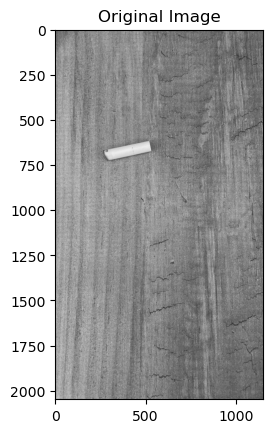

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("photos/img1.pgm", 0)

# Display the original image
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.show()

Filtering

Applying a high kernel size Gaussian Blur filter is selected for thresholding the image better by ignoring the edges in the background for the next step.

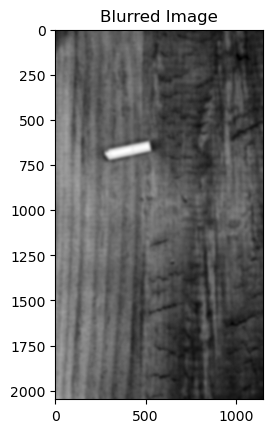

In [2]:
# Apply blur to the image
kernelSize = 45
blurKernel = (kernelSize, kernelSize)
sigmaX = 0
blurredImage = cv2.GaussianBlur(image, blurKernel, sigmaX)

# Display the blurred image
plt.imshow(blurredImage, cmap="gray")
plt.title("Blurred Image")
plt.show()

Segmentation

Applying a global threshold to the image will result in detecting the objects.

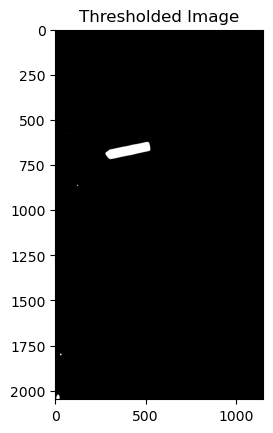

In [3]:
# Threshold the image
_, thresholdedImage = cv2.threshold(blurredImage, 175, 255, cv2.THRESH_BINARY)

# Display the thresholded image
plt.imshow(thresholdedImage, cmap="gray")
plt.title("Thresholded Image")
plt.show()

Edge Detection

The edges were detected with the Canny Edge Detection Technique.

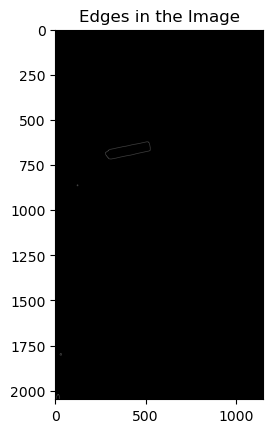

In [4]:
# Apply Canny edge detection
edges = cv2.Canny(thresholdedImage, 0, 255)

# Display the edges
plt.imshow(edges, cmap="gray")
plt.title("Edges in the Image")
plt.show()

Morphological Operators

A closing morphological operator was applied to the image to avoid having non-continuous edges during the processing. This operator was used to detect the yellow-filter cigarette butts better by closing the gap between the white tobacco paper and the yellow filter parts.

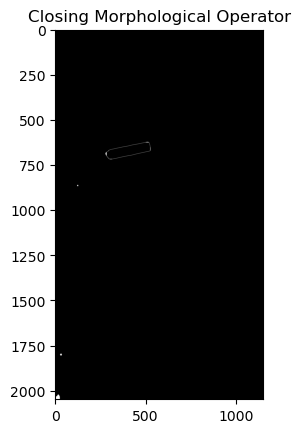

In [5]:
kernel = np.ones((20, 20), np.uint8)

# Perform closing operation (dilation followed by erosion)
closingMorph = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

plt.imshow(closingMorph, cmap="gray")
plt.title("Closing Morphological Operator")
plt.show()

Connected Component Analysis

Connected component analysis done by eight connected object. Objects are labeled.

In [6]:
numLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(
    closingMorph, connectivity=8
)

Feature Extraction

Feature extraction was used by detecting the contours in the image. Then, the contour areas were calculated and thresholded by low and high area values. This is required to detect the area of a standard cigarette butt than the other areas.

In [7]:
# Create a black canvas to draw contours
contourImage = np.zeros_like(image)

numCigButts = 0

# Iterate through each component (except the background)
for label in range(1, numLabels):
    mask = (labels == label).astype(np.uint8) * 255  # Create a mask for each component
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        # Calculate contour area
        area = cv2.contourArea(contour)

        # Set a threshold for the minimum contour area to keep
        minArea = 3000  # You can adjust this threshold as needed
        maxArea = 15000  # You can adjust this threshold as needed

        # Draw rectangles over the detected cigarette butts and place labels
        # Determine the position and size of the rectangles to point at the cigarette butts
        x, y, w, h = cv2.boundingRect(
            contour
        )  # x: axis, y: ordinate, w: width, h: height

        if area > minArea and area < maxArea:
            numCigButts += 1
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 5)
            rectLabel = f"Cigarette Butt {numCigButts}"
            cv2.putText(
                image, rectLabel, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3
            )

Display the final result

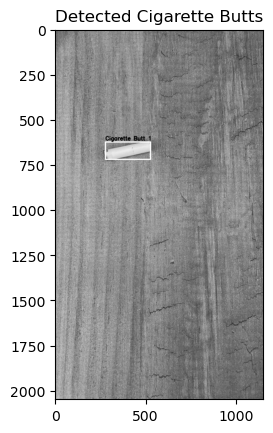

In [8]:
# Display the image with rectangles and labels
plt.imshow(image, cmap="gray")
plt.title("Detected Cigarette Butts")
plt.show()